In [48]:
import networkx as nx
import xml.etree.ElementTree as ET
import glob
import errno
import numpy as np
import pandas as pd
from nxviz.plots import CircosPlot

from itertools import combinations
import matplotlib.pyplot as plt

from networkx.algorithms.community import greedy_modularity_communities

In [2]:
def get_authors(filename):
    coauthors = []
    e = ET.parse(filename)
    for author in e.getroot().iter("contrib"):
        if 'author' in author.attrib.values():
            namenode = author.find("name")
            if namenode is not None:
                try:
                    surname = namenode.find("surname").text
                except AttributeError:
                    continue  # skip authors with no surname
                try:
                    givenname = namenode.find("given-names").text
                except AttributeError:
                    givenname = "Unknown"  # ignore missing first names
                fullname = "%s %s" % (givenname, surname)
                coauthors.append(fullname.encode('utf-8').decode('utf-8'))
    return coauthors


In [9]:
path = "Acad_Med/*.nxml"
files = glob.glob(path)
data=[]
for name in files:
    try:
        with open(name) as f:
            da=get_authors(f)
            data.append(da)
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise

In [10]:
print(data)

[['Muthiah Vaduganathan', 'Jasmine Rassiwala', 'Jessica Evert'], ['Marcelo Schweller', 'Felipe Osorio Costa', 'Maria Ângela R.G.M. Antônio', 'Eliana M. Amaral', 'Marco Antonio de Carvalho-Filho'], ['Jochanan Benbassat'], ['Jennifer C. Kesselheim', 'Pengling Sun', 'Alan D. Woolf', 'Wendy B. London', 'Debra Boyer'], ['Peter G. Szilagyi', 'Laura P. Shone', 'Ann M. Dozier', 'Gail L. Newton', 'Theresa Green', 'Nancy M. Bennett'], ['Linda A. Headrick', 'Greg Ogrinc', 'Kimberly G. Hoffman', 'Katherine M. Stevenson', 'Marc Shalaby', 'Albertine S. Beard', 'Karin E. Thörne', 'Mary T. Coleman', 'Karyn D. Baum'], ['John R. Raymond', 'Joseph E. Kerschner', 'William J. Hueston', 'Cheryl A. Maurana'], ['H.G.A. Ria Jochemsen-van der Leeuw', 'Nynke van Dijk', 'Margreet Wieringa-de Waard'], ['Vivian S. Lee', 'Thomas Miller', 'Chrissy Daniels', 'Marilynn Paine', 'Brian Gresh', 'A. Lorris Betz'], ['Lisa K. Allen-Scott', 'Bonnie Buntain', 'Jennifer M. Hatfield', 'Andrea Meisser', 'Christopher James Thomas'

In [11]:
author_connections = list(
    map(lambda x: list(combinations(x[::-1], 2)), data))


In [16]:
print(author_connections)

[[('Jessica Evert', 'Jasmine Rassiwala'), ('Jessica Evert', 'Muthiah Vaduganathan'), ('Jasmine Rassiwala', 'Muthiah Vaduganathan')], [('Marco Antonio de Carvalho-Filho', 'Eliana M. Amaral'), ('Marco Antonio de Carvalho-Filho', 'Maria Ângela R.G.M. Antônio'), ('Marco Antonio de Carvalho-Filho', 'Felipe Osorio Costa'), ('Marco Antonio de Carvalho-Filho', 'Marcelo Schweller'), ('Eliana M. Amaral', 'Maria Ângela R.G.M. Antônio'), ('Eliana M. Amaral', 'Felipe Osorio Costa'), ('Eliana M. Amaral', 'Marcelo Schweller'), ('Maria Ângela R.G.M. Antônio', 'Felipe Osorio Costa'), ('Maria Ângela R.G.M. Antônio', 'Marcelo Schweller'), ('Felipe Osorio Costa', 'Marcelo Schweller')], [], [('Debra Boyer', 'Wendy B. London'), ('Debra Boyer', 'Alan D. Woolf'), ('Debra Boyer', 'Pengling Sun'), ('Debra Boyer', 'Jennifer C. Kesselheim'), ('Wendy B. London', 'Alan D. Woolf'), ('Wendy B. London', 'Pengling Sun'), ('Wendy B. London', 'Jennifer C. Kesselheim'), ('Alan D. Woolf', 'Pengling Sun'), ('Alan D. Woolf',

In [17]:
single_connection= [item for sublist in author_connections for item in sublist]

In [74]:
print(single_connection)

[('Jessica Evert', 'Jasmine Rassiwala'), ('Jessica Evert', 'Muthiah Vaduganathan'), ('Jasmine Rassiwala', 'Muthiah Vaduganathan'), ('Marco Antonio de Carvalho-Filho', 'Eliana M. Amaral'), ('Marco Antonio de Carvalho-Filho', 'Maria Ângela R.G.M. Antônio'), ('Marco Antonio de Carvalho-Filho', 'Felipe Osorio Costa'), ('Marco Antonio de Carvalho-Filho', 'Marcelo Schweller'), ('Eliana M. Amaral', 'Maria Ângela R.G.M. Antônio'), ('Eliana M. Amaral', 'Felipe Osorio Costa'), ('Eliana M. Amaral', 'Marcelo Schweller'), ('Maria Ângela R.G.M. Antônio', 'Felipe Osorio Costa'), ('Maria Ângela R.G.M. Antônio', 'Marcelo Schweller'), ('Felipe Osorio Costa', 'Marcelo Schweller'), ('Debra Boyer', 'Wendy B. London'), ('Debra Boyer', 'Alan D. Woolf'), ('Debra Boyer', 'Pengling Sun'), ('Debra Boyer', 'Jennifer C. Kesselheim'), ('Wendy B. London', 'Alan D. Woolf'), ('Wendy B. London', 'Pengling Sun'), ('Wendy B. London', 'Jennifer C. Kesselheim'), ('Alan D. Woolf', 'Pengling Sun'), ('Alan D. Woolf', 'Jennife

In [19]:
df = pd.DataFrame(single_connection, columns=["From", "To"])

In [21]:
df.head(10)

,From,To
0,Jessica Evert,Jasmine Rassiwala
1,Jessica Evert,Muthiah Vaduganathan
2,Jasmine Rassiwala,Muthiah Vaduganathan
3,Marco Antonio de Carvalho-Filho,Eliana M. Amaral
4,Marco Antonio de Carvalho-Filho,Maria Ângela R.G.M. Antônio
5,Marco Antonio de Carvalho-Filho,Felipe Osorio Costa
6,Marco Antonio de Carvalho-Filho,Marcelo Schweller
7,Eliana M. Amaral,Maria Ângela R.G.M. Antônio
8,Eliana M. Amaral,Felipe Osorio Costa
9,Eliana M. Amaral,Marcelo Schweller


In [22]:
df_graph = df.groupby(["From", "To"]).size().reset_index()
df_graph.columns = ["From", "To", "Count"]



In [24]:
df_graph.head(10)

,From,To,Count
0,A. Hal Strelnick,Anne Kissack,1
1,A. Hal Strelnick,Bernice B. Rumala,1
2,A. Hal Strelnick,Carol Ferrans,1
3,A. Hal Strelnick,Davera Gabriel,1
4,A. Hal Strelnick,Giselle Corbie-Smith,1
5,A. Hal Strelnick,Karen Calhoun,1
6,A. Hal Strelnick,Karen Hacker,1
7,A. Hal Strelnick,Linda Ziegahn,1
8,A. Hal Strelnick,Lori Carter-Edwards,1
9,A. Hal Strelnick,Milton “Mickey” Eder,1


In [25]:
G = nx.from_pandas_edgelist(
    df_graph, source="From", target="To", edge_attr="Count")


In [28]:
print(len(G.edges()))
print(len(G.nodes()))


588
191


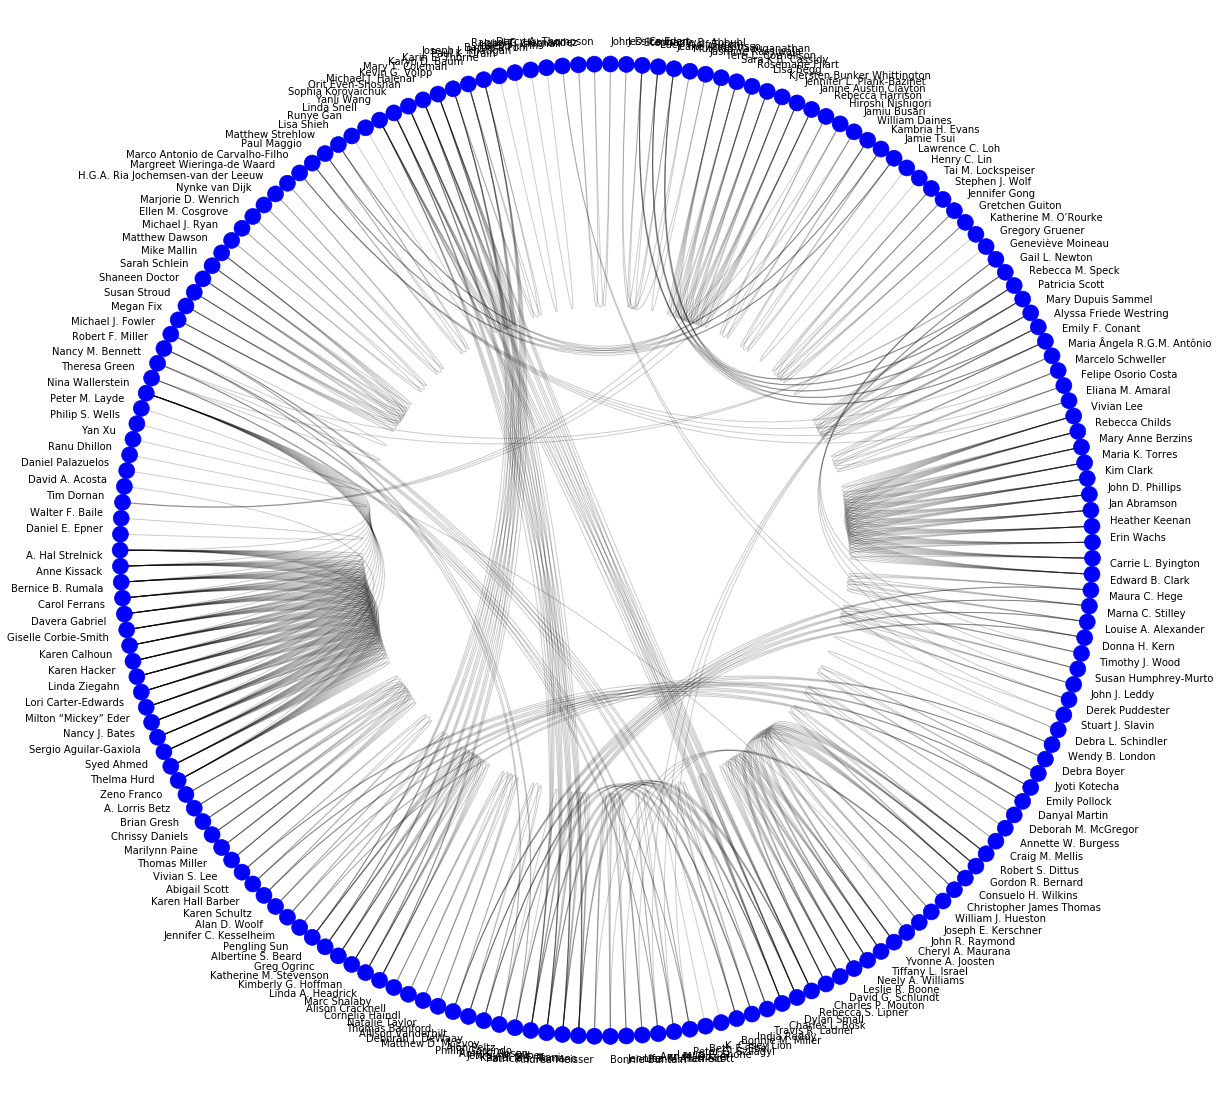

In [31]:
c = CircosPlot(
    G,
    dpi=600,
    
    figsize=(20, 20),
    node_labels=True,
)
c.draw()
plt.show()

In [75]:
deg = nx.degree_centrality(G)
bet = nx.betweenness_centrality(G)

In [76]:
print(deg)

{'A. Hal Strelnick': 0.08421052631578947, 'Anne Kissack': 0.08421052631578947, 'Bernice B. Rumala': 0.08421052631578947, 'Carol Ferrans': 0.08421052631578947, 'Davera Gabriel': 0.08421052631578947, 'Giselle Corbie-Smith': 0.08421052631578947, 'Karen Calhoun': 0.08421052631578947, 'Karen Hacker': 0.08421052631578947, 'Linda Ziegahn': 0.08421052631578947, 'Lori Carter-Edwards': 0.08421052631578947, 'Milton “Mickey” Eder': 0.08421052631578947, 'Nancy J. Bates': 0.08421052631578947, 'Sergio Aguilar-Gaxiola': 0.08947368421052632, 'Syed Ahmed': 0.08421052631578947, 'Thelma Hurd': 0.08421052631578947, 'Zeno Franco': 0.08421052631578947, 'A. Lorris Betz': 0.02631578947368421, 'Brian Gresh': 0.02631578947368421, 'Chrissy Daniels': 0.02631578947368421, 'Marilynn Paine': 0.02631578947368421, 'Thomas Miller': 0.02631578947368421, 'Vivian S. Lee': 0.02631578947368421, 'Abigail Scott': 0.02631578947368421, 'Karen Hall Barber': 0.02631578947368421, 'Karen Schultz': 0.02631578947368421, 'Alan D. Woolf

In [77]:
c = list(greedy_modularity_communities(G))

In [78]:
sorted(c[0])

['A. Hal Strelnick',
 'Anne Kissack',
 'Bernice B. Rumala',
 'Carol Ferrans',
 'Davera Gabriel',
 'David A. Acosta',
 'Giselle Corbie-Smith',
 'Karen Calhoun',
 'Karen Hacker',
 'Linda Ziegahn',
 'Lori Carter-Edwards',
 'Milton “Mickey” Eder',
 'Nancy J. Bates',
 'Nina Wallerstein',
 'Sergio Aguilar-Gaxiola',
 'Syed Ahmed',
 'Thelma Hurd',
 'Zeno Franco']

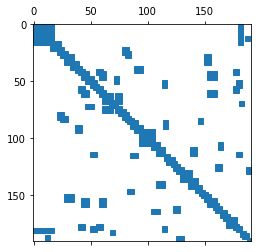

In [79]:
A = nx.adjacency_matrix(G)
plt.spy(A, markersize=5)
plt.show()

In [80]:
print(A.todense())

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
